## *Regression Logistique*
$$ h_w(x)=\frac{1}{1+e^{-wx}}$$

$$J(w)=\frac{-1}{m}\sum(y^i log(h_w(x^i))+(1-y/i)log(1-h_w(x^i))$$

$$ wj := w_j-\alpha \frac{\delta J(w_j)}{\delta w_j}= w_j-\alpha \sum(h_w(x^i)-y_i)x_j$$
$x^i$: le i ieme exemple

$x_j$: La j eme composante de x

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

TypeError: can't multiply sequence by non-int of type 'float'

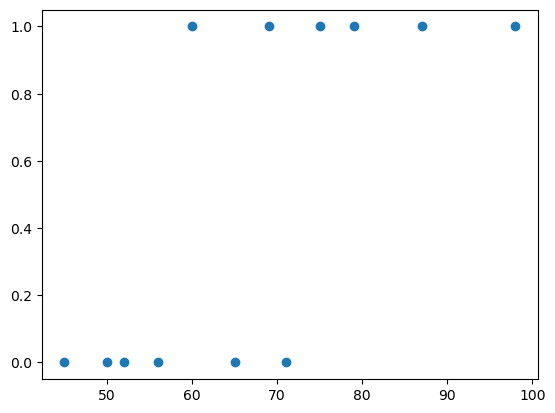

In [61]:
x=np.array([45,50,52, 56,60,65,69,71, 75, 79,87,98])
y=np.array([0,0,0,0,1,0,1,0,1,1,1,1])
w=np.array([0.2,-0.1])

plt.scatter(x,y)

def compute_cost(x,y,w) :
    cost = 0.0
    wx = w[0] + w[1]*x
    hx = 1/(1+np.exp(-wx))

    cost = np.sum(y*np.log(hx)+ (1-y)*(1-np.log(hx)))
    return cost
    
compute_cost(x,y,w)

def descente_grad(x,y,w,alpha,maxiter):
    m=x.shape[0]
    J=[]
    for i in range (maxiter):
        wx = w[0] + w[1]*x
        hx = 1/(1+np.exp(-wx))        
        E=compute_cost(x,y,w)
        J.append(E)
        w[1]-=alpha*(hx-y).dot(x)/m
        w[0]-=alpha*np.mean(hx-y)
    return w,J


def logistique_reg(x, y, W, compute_cost, descente_grad, alpha, maxiter):

    J = []
    for i in range(maxiter):

        dj_dw0,dj_dw = descente_grad(x, y, W,alpha,maxiter)

        W[1] = W[1] - alpha * dj_dw
        W[0] = W[0] - alpha * dj_dw0

        if i<100000:
            J.append( compute_cost(x, y, W))

        if i % math.ceil(maxiter / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J[-1].item():8.2f} : W : {W[1]} W0 : {W[0]}")


    return W


iterations = 2000
alpha = 0.000001

w_final = logistique_reg(x, y, w,compute_cost, descente_grad, alpha, iterations)
print(f"W0,W Trouvee: {w_final[0]:0.2f},{w_final[1].tolist()} ")

predictions = np.dot(x, w_final[1]) + w_final[0]

r2 = r2_score(y, predictions)
print("score:", r2)